# Create a dataset
Sometimes, you may need to create a dataset if you’re working with your own data. Creating a dataset with 🤗 Datasets confers all the advantages of the library to your dataset: fast loading and processing, stream enormous datasets, memory-mapping, and more. You can easily and rapidly create a dataset with 🤗 Datasets low-code approaches, reducing the time it takes to start training a model. In many cases, it is as easy as dragging and dropping your data files into a dataset repository on the Hub.

In this tutorial, you’ll learn how to use 🤗 Datasets low-code methods for creating all types of datasets:

Folder-based builders for quickly creating an image or audio dataset
from_ methods for creating datasets from local files
File-based builders
🤗 Datasets supports many common formats such as csv, json/jsonl, parquet, txt.

For example it can read a dataset made up of one or several CSV files (in this case, pass your CSV files as a list):

In [1]:
from datasets import load_dataset
dataset = load_dataset("csv", data_files="my_file.csv")

FileNotFoundError: Unable to find '/Users/andrewreusche/Documents/coding/Transformers/TransformersDeepDive/HuggingFace_LLMCourse/HF_Datasets/my_file.csv'

To get the list of supported formats and code examples, follow this guide here.

## Folder-based builders
There are two folder-based builders, ImageFolder and AudioFolder. These are low-code methods for quickly creating an image or speech and audio dataset with several thousand examples. They are great for rapidly prototyping computer vision and speech models before scaling to a larger dataset. Folder-based builders takes your data and automatically generates the dataset’s features, splits, and labels. Under the hood:

    ImageFolder uses the Image feature to decode an image file. Many image extension formats are supported, such as jpg and png, but other formats are also supported. You can check the complete list of supported image extensions.

    AudioFolder uses the Audio feature to decode an audio file. Extensions such as wav, mp3, and even mp4 are supported, and you can check the complete list of supported audio extensions. Decoding is done via ffmpeg.
The dataset splits are generated from the repository structure, and the label names are automatically inferred from the directory name.

For example, if your image dataset (it is the same for an audio dataset) is stored like this:

Then this is how the folder-based builder generates an example:
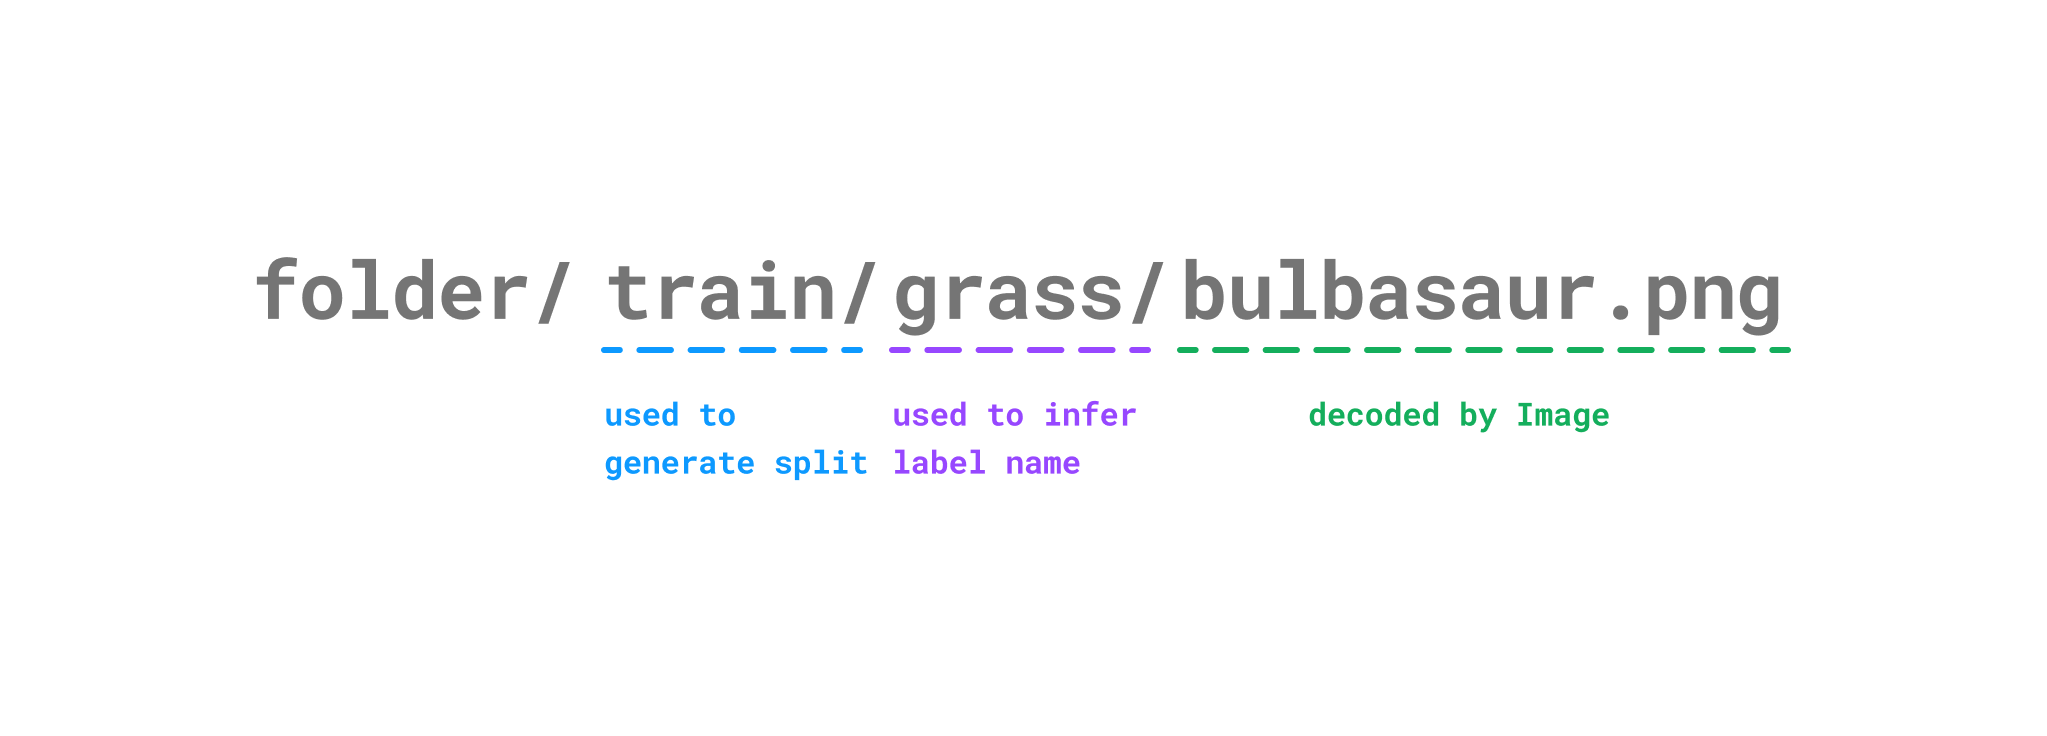

Create the image dataset by specifying imagefolder in load_dataset():



In [ ]:
from datasets import load_dataset

dataset = load_dataset("imagefolder", data_dir="/path/to/pokemon")

An audio dataset is created in the same way, except you specify audiofolder in load_dataset() instead:

In [ ]:
from datasets import load_dataset

dataset = load_dataset("audiofolder", data_dir="/path/to/folder")

Any additional information about your dataset, such as text captions or transcriptions, can be included with a metadata.csv file in the folder containing your dataset. The metadata file needs to have a file_name column that links the image or audio file to its corresponding metadata:

In [ ]:
file_name, text
bulbasaur.png, There is a plant seed on its back right from the day this Pokémon is born.
charmander.png, It has a preference for hot things.
squirtle.png, When it retracts its long neck into its shell, it squirts out water with vigorous force.

To learn more about each of these folder-based builders, check out the and ImageFolder or AudioFolder guides.

## From Python dictionaries
You can also create a dataset from data in Python dictionaries. There are two ways you can create a dataset using the from_ methods:

The from_generator() method is the most memory-efficient way to create a dataset from a generator due to a generators iterative behavior. This is especially useful when you’re working with a really large dataset that may not fit in memory, since the dataset is generated on disk progressively and then memory-mapped.

In [4]:
from datasets import Dataset
def gen():
    yield {"pokemon": "bulbasaur", "type": "grass"}
    yield {"pokemon": "squirtle", "type": "water"}
ds = Dataset.from_generator(gen)
ds[0]

Generating train split: 0 examples [00:00, ? examples/s]

{'pokemon': 'bulbasaur', 'type': 'grass'}

A generator-based IterableDataset needs to be iterated over with a for loop for example:

In [5]:
from datasets import IterableDataset
ds = IterableDataset.from_generator(gen)
for example in ds:
    print(example)

{'pokemon': 'bulbasaur', 'type': 'grass'}
{'pokemon': 'squirtle', 'type': 'water'}


The from_dict() method is a straightforward way to create a dataset from a dictionary:

In [6]:
from datasets import Dataset
ds = Dataset.from_dict({"pokemon": ["bulbasaur", "squirtle"], "type": ["grass", "water"]})
ds[0]

{'pokemon': 'bulbasaur', 'type': 'grass'}

To create an image or audio dataset, chain the cast_column() method with from_dict() and specify the column and feature type. For example, to create an audio dataset:



In [ ]:
audio_dataset = Dataset.from_dict({"audio": ["path/to/audio_1", ..., "path/to/audio_n"]}).cast_column("audio", Audio())

Now that you know how to create a dataset, consider sharing it on the Hub so the community can also benefit from your work! Go on to the next section to learn how to share your dataset.